In [465]:
# 📚 Basic Libraries
import numpy as np # operaciones matemáticas (numerical python)
import pandas as pd # manipulación de datos
import warnings # nobody likes warnings

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report 

In [466]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

In [576]:
wine4 = pd.read_csv("wine4.csv")

In [577]:
wine4.head()

,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,0.70,0.00,1.90,0.08,34.00,1.00,3.51,0.56,9.40,5
1,0.88,0.00,2.60,0.10,67.00,1.00,3.20,0.68,9.80,5
2,0.76,0.04,2.30,0.09,54.00,1.00,3.26,0.65,9.80,5
3,0.28,0.56,1.90,0.07,60.00,1.00,3.16,0.58,9.80,6
4,0.70,0.00,1.90,0.08,34.00,1.00,3.51,0.56,9.40,5


In [579]:
wine4.shape

(1590, 10)

In [474]:
wine["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

<h2 style="color: #FF6347;">Moving our target to the right</h2>

In [485]:
# Nuestro Target ya se encuentra a la derecha. Sería la columna "Quality" que en este caso es lo que vamos a determinar con nuestro modelo de Machine Learning.

### MAPPING THE TARGET!!!! 

In [581]:
wine4.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [582]:
mapeo = {
    0: 1,  # Malo
    1: 1,  # Malo
    2: 1,  # Malo
    3: 1,  # Malo
    4: 1,  # Malo
    5: 1,  # Malo
    6: 2,  # Bueno
    7: 2,  # Bueno
    8: 2,  # Bueno
    9: 2,  # Bueno
    10: 2, # Bueno
}

In [583]:
wine4["quality"] = wine4["quality"].map(mapeo) 

In [584]:
wine4.quality.value_counts()

quality
2    852
1    738
Name: count, dtype: int64

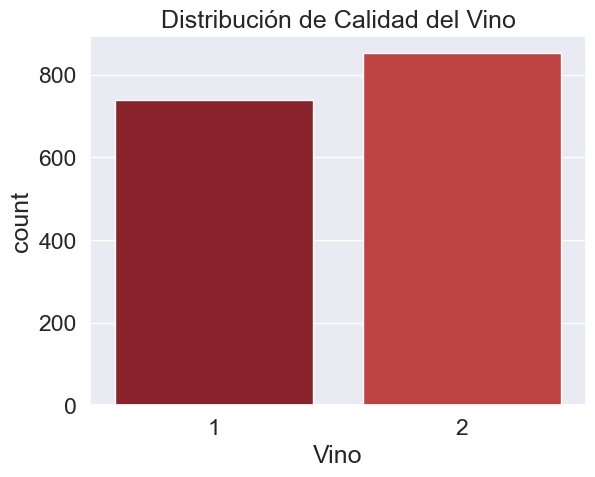

In [585]:

rojo_intenso_palette = ["#9B111E", "#D32F2F", "#C2185B"]  

sns.countplot(data=wine4, x="quality", palette=rojo_intenso_palette)

plt.xlabel("Vino")
plt.title("Distribución de Calidad del Vino")

plt.show()

In [586]:
# No está desbalanceado

<Axes: xlabel='volatile_acidity', ylabel='Count'>

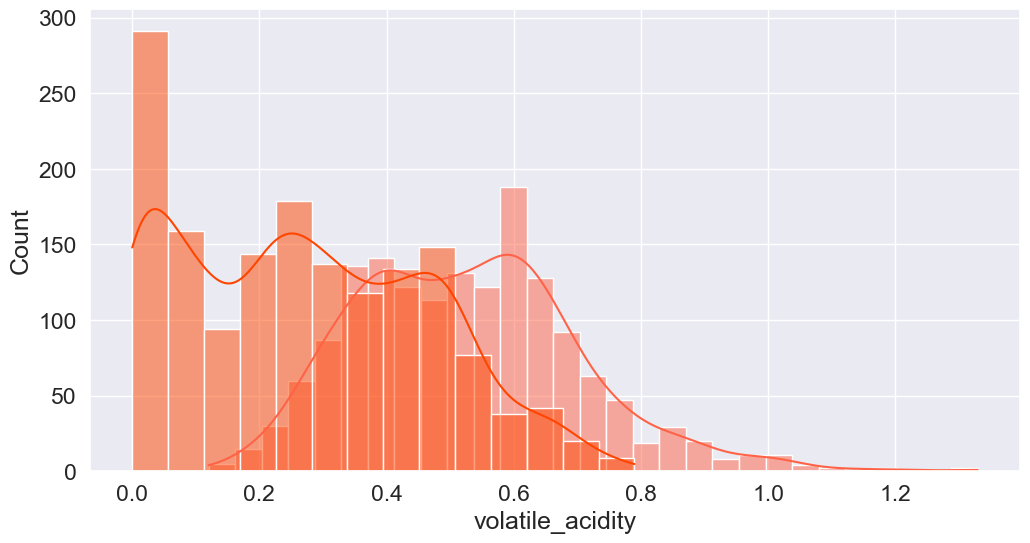

In [587]:
plt.figure(figsize=(12, 6))

sns.histplot(wine4["volatile_acidity"], color="#FF6347", kde=True, label="Volatile Acidity")
sns.histplot(wine4["citric_acid"], color="#FF4500", kde=True, label="Citric Acid")


In [496]:
# Al haber observado este grafico para visualizar la correlacion entre las columnas "volatile_acidity" y "citric_acid", podemos ver claramente una altísima correlación. 

<h2 style="color: #FF6347;">Residual Sugar EDA</h2>

<Axes: xlabel='residual_sugar', ylabel='Count'>

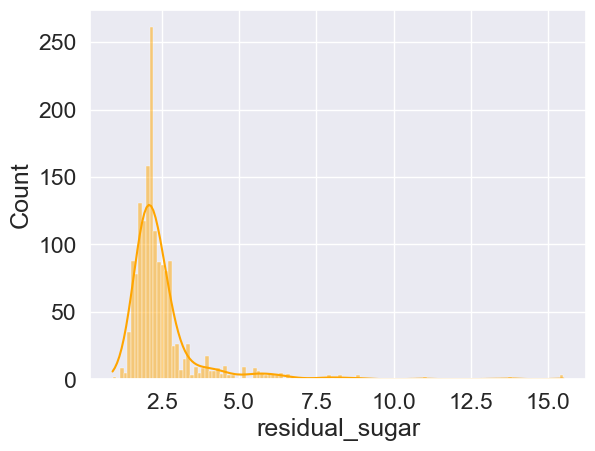

In [574]:
sns.histplot(wine2["residual_sugar"], color="orange", kde=True)

# TRANSFORMACIONES PRE-PROCESSING

<h2 style="color: #FF6347;">Checking Distributions</h2>

In [499]:
#Voy a ver las distribuciones por ver si necesito transformar alguna cosa.  

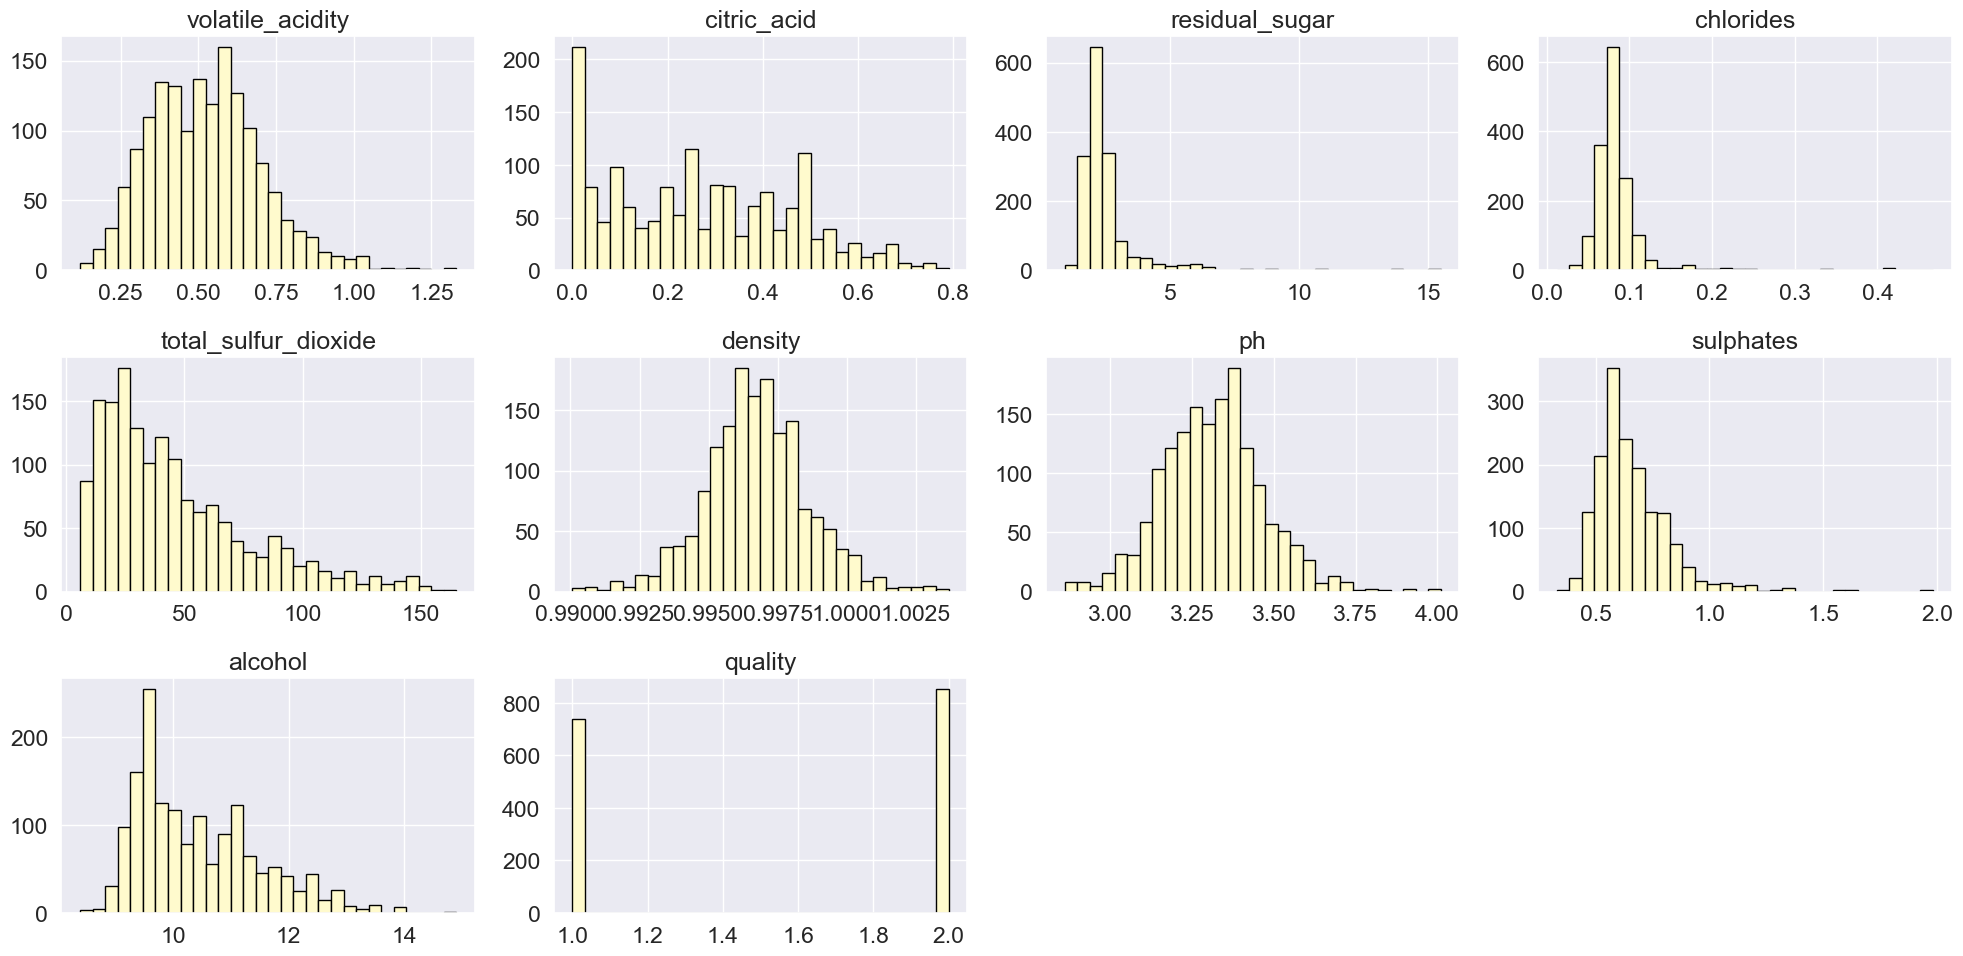

In [588]:
color = '#FFFACD'

nrows, ncols = 5, 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(wine4.columns):
        ax.set_visible(False)  
        continue
    ax.hist(wine4.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(wine4.columns[i])

plt.tight_layout()
plt.show()

1. Normalización o Escalado

In [589]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['chlorides', 'volatile_acidity']
scaler = StandardScaler() 
wine2[columns_to_scale] = scaler.fit_transform(wine2[columns_to_scale])

In [590]:
print(wine2[columns_to_scale].dtypes)

chlorides           float64
volatile_acidity    float64
dtype: object


In [591]:
wine2.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.40,0.96,0.00,1.90,-0.24,34.00,1.00,3.51,0.56,9.40,1
1,7.80,1.97,0.00,2.60,0.22,67.00,1.00,3.20,0.68,9.80,1
2,7.80,1.30,0.04,2.30,0.10,54.00,1.00,3.26,0.65,9.80,1
3,11.20,-1.38,0.56,1.90,-0.26,60.00,1.00,3.16,0.58,9.80,2
4,7.40,0.96,0.00,1.90,-0.24,34.00,1.00,3.51,0.56,9.40,1


In [592]:
print("Antes:")
print(wine4[columns_to_scale].head())

print("Después:")
print(scaler.transform(wine4[columns_to_scale].head()))

Antes:
   chlorides  volatile_acidity
0       0.08              0.70
1       0.10              0.88
2       0.09              0.76
3       0.07              0.28
4       0.08              0.70
Después:
[[-0.63639045  3.43109932]
 [-0.35630891  4.89922536]
 [-0.43269478  3.92047466]
 [-0.64912143  0.00547188]
 [-0.63639045  3.43109932]]


<h1 style="color: #FF8C00;">| Data Preprocessing </h1>

<h2 style="color: #FF6347;">X-Y Split</h2>

In [593]:
y = wine4['quality']
X = wine4.drop(columns = ['quality'])

<h1 style="color: #FF8C00;">| Modeling</h1>

<h2 style="color: #FF6347;">Train-Test Split</h2>

In [594]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [596]:
print(f'100% of our data: {len(wine4)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')

100% of our data: 1590.
70% for training data: 1113.
30% for test data: 477.


<h2 style="color: #FF6347;">Model Selection: Logistic Regression</h2>

In [597]:

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

<h2 style="color: #FF6347;">Model Validation</h2>

In [598]:
predictions = model.predict(X_test)

In [599]:
len(predictions)

477

In [600]:
print(f'30% for test prediction data: {len(predictions)}.')

30% for test prediction data: 477.


In [601]:
predictions

array([1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1,
       2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1,

<h3 style="color: #FF6347;">Metrics</h3>

In [602]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.74      0.71      0.72       233
           2       0.73      0.76      0.75       244

    accuracy                           0.74       477
   macro avg       0.74      0.74      0.74       477
weighted avg       0.74      0.74      0.74       477



In [603]:
print("Test data accuracy: ",model.score(X_test,y_test))
print("Train data accuracy: ", model.score(X_train, y_train))

Test data accuracy:  0.7358490566037735
Train data accuracy:  0.7547169811320755


In [604]:
cm = confusion_matrix(y_test, predictions)

<Figure size 800x600 with 0 Axes>

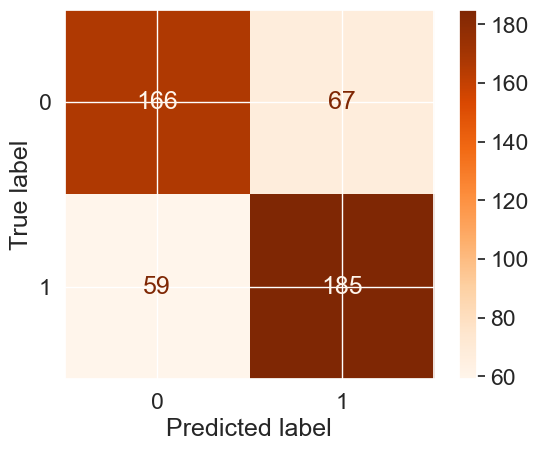

In [605]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')  
plt.grid(True)
plt.show()

<h1 style="color: #FF8C00;">| Improving the Model</h1>

In [607]:
scaler = StandardScaler()
wine2[columns_to_scale] = scaler.fit_transform(wine2[columns_to_scale])

# Paso 2: Revertir estandarización 
wine2[columns_to_scale] = scaler.inverse_transform(wine2[columns_to_scale])

# Paso 3: Aplicar MinMaxScaler
min_max_scaler = MinMaxScaler()
wine2[columns_to_scale] = min_max_scaler.fit_transform(wine2[columns_to_scale])

<h2 style="color: #FF6347;">Selecting the Model: K-Nearest Neighbors</h2>

In [608]:
from sklearn.neighbors import KNeighborsClassifier

In [609]:
model = KNeighborsClassifier(n_neighbors=11)
model = model.fit(X_train, y_train)
model.predict(X_test)
predictions = model.predict(X_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [610]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.66      0.61      0.63       233
           2       0.65      0.70      0.68       244

    accuracy                           0.66       477
   macro avg       0.66      0.66      0.65       477
weighted avg       0.66      0.66      0.66       477



In [611]:
print("Test data accuracy: ",model.score(X_test,y_test))
print("Train data accuracy: ", model.score(X_train, y_train))

Test data accuracy:  0.6561844863731656
Train data accuracy:  0.7619047619047619


In [612]:
cm = confusion_matrix(y_test, predictions)

<Figure size 800x600 with 0 Axes>

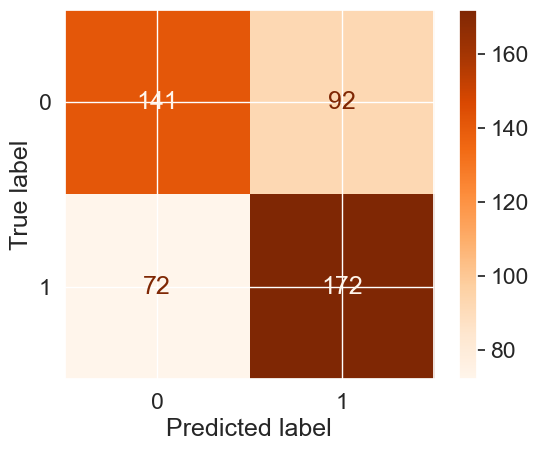

In [613]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')  
plt.grid(True)
plt.show()

<h3 style="color: #FF6347;">Hyperparameter Tunning</h3>

In [614]:
n_neighbors = range(5, 30)
test = []
train = []

for neighbors in n_neighbors:
    model = KNeighborsClassifier(n_neighbors=neighbors)
    model.fit(X_train, y_train)
    test.append(model.score(X_test,y_test))
    train.append(model.score(X_train,y_train))

In [615]:
import plotly.graph_objs as go

In [616]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(n_neighbors), y=test, name='Testing Accuracy'))
fig.update_layout(xaxis_title='Accuracy', yaxis_title='Max Neighboors', title='')
fig.show()

<h2 style="color: #FF6347;">Selecting the Model: Decision Trees (tree-based)</h2>

In [617]:
from sklearn.tree import DecisionTreeClassifier

In [618]:
model = DecisionTreeClassifier(max_depth=3)
model = model.fit(X_train, y_train)
model.predict(X_test)
predictions = model.predict(X_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [619]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.78      0.49      0.60       233
           2       0.64      0.86      0.74       244

    accuracy                           0.68       477
   macro avg       0.71      0.68      0.67       477
weighted avg       0.71      0.68      0.67       477



In [620]:
print("Test data accuracy: ",model.score(X_test,y_test))
print("Train data accuracy: ", model.score(X_train, y_train))

Test data accuracy:  0.6834381551362684
Train data accuracy:  0.7367475292003594


In [621]:
cm = confusion_matrix(y_test, predictions)

<Figure size 800x600 with 0 Axes>

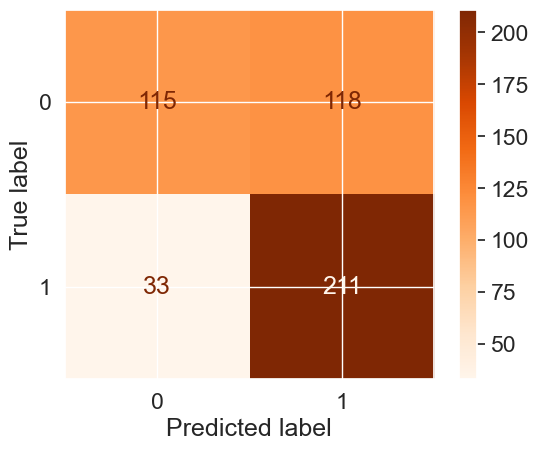

In [622]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')  
plt.grid(True)
plt.show()

<h3 style="color: #FF6347;">Hyperparameter Tunning</h3>

In [623]:
max_depth = range(1, 30)
test = []
train = []

for depth in max_depth:
    model = DecisionTreeClassifier(max_depth= depth)
    model.fit(X_train, y_train)
    test.append(model.score(X_test,y_test))
    train.append(model.score(X_train,y_train))

In [624]:
import plotly.graph_objs as go

In [625]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(max_depth), y=test, name='Testing Accuracy'))
fig.update_layout(xaxis_title='Accuracy', yaxis_title='Max Tree Depth', title='')
fig.show()

<h2 style="color: #FF6347;">Selecting the Model: Super Vector Machine</h2>

In [626]:
from sklearn.svm import LinearSVC

In [627]:
model = LinearSVC()
model = model.fit(X_train, y_train)
model.predict(X_test)
predictions = model.predict(X_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [628]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.82      0.16      0.27       233
           2       0.55      0.97      0.70       244

    accuracy                           0.57       477
   macro avg       0.68      0.56      0.48       477
weighted avg       0.68      0.57      0.49       477



In [629]:
print("Test data accuracy: ",model.score(X_test,y_test))
print("Train data accuracy: ", model.score(X_train, y_train))

Test data accuracy:  0.5723270440251572
Train data accuracy:  0.6073674752920036


In [630]:
cm = confusion_matrix(y_test, predictions)

<Figure size 800x600 with 0 Axes>

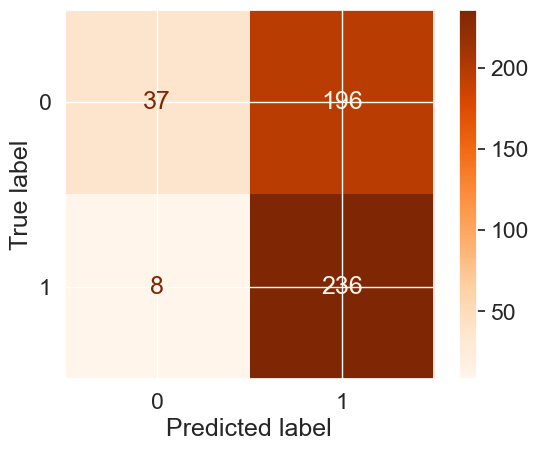

In [631]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')  
plt.grid(True)
plt.show()

<h1 style="color: #FF8C00;">| Reporting</h1>

In [632]:
cm = confusion_matrix(y_test, predictions)

<Figure size 800x600 with 0 Axes>

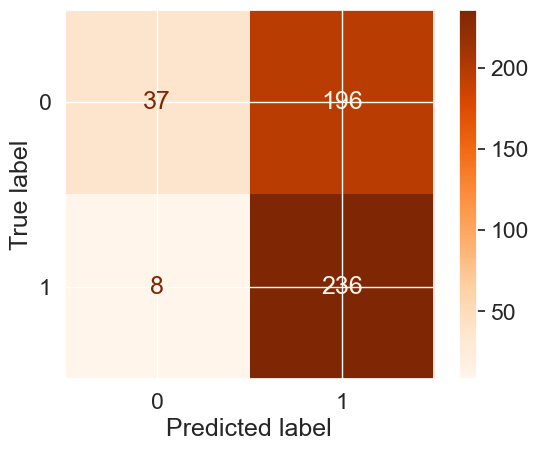

In [633]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')  
plt.grid(True)
plt.show()

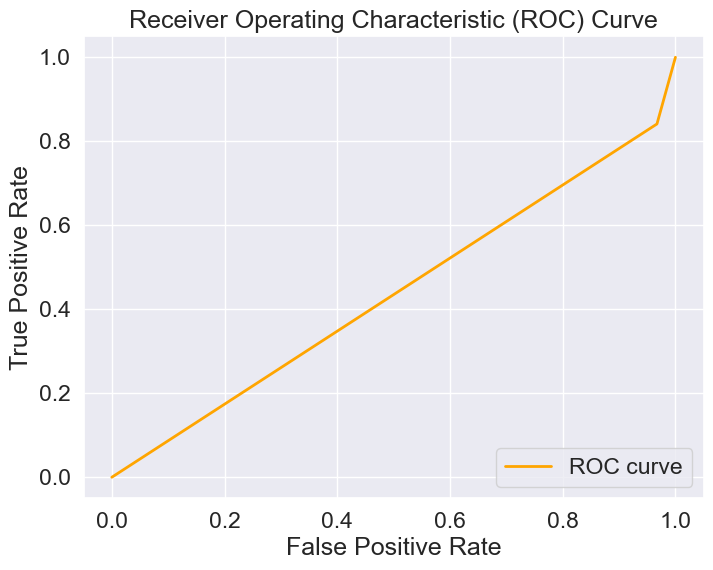

In [634]:
fpr, tpr, thresholds = roc_curve(y_test, predictions, pos_label=1)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [635]:
### IMBALANCE

In [636]:
import warnings
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

## Vamos con los predicts

In [565]:
from lazypredict.Supervised import LazyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

## Procesamiento Básico

In [638]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar la forma de los conjuntos de datos
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)

Tamaño de X_train: (1272, 9)
Tamaño de X_test: (318, 9)


### Grid Search

In [639]:
rf = RandomForestClassifier(random_state=42)

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],            # Número de árboles
    'max_depth': [None, 10, 20, 30],           # Profundidad máxima
    'min_samples_split': [2, 5, 10],           # Min. muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],             # Min. muestras en una hoja
    'max_features': ['sqrt', 'log2'],          # Número de características consideradas
    'bootstrap': [True, False]                 # Muestreo con reemplazo
}

# Configurar el Grid Search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1_macro',  # Puedes cambiar a 'accuracy' o 'roc_auc_ovo' según tu caso
    cv=5,                # Número de divisiones para validación cruzada
    verbose=2,
    n_jobs=-1            # Usar todos los núcleos disponibles
)

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Ver los mejores parámetros
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor score (F1): {grid_search.best_score_}")

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Mejores parámetros: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Mejor score (F1): 0.8058548185859505


In [568]:
best_params = {
    'bootstrap': False,
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 5,
    'n_estimators': 100
}

# Crear el modelo con los mejores parámetros
rf = RandomForestClassifier(**best_params, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, min_samples_split=5, random_state=42)

In [569]:
from sklearn.metrics import classification_report, accuracy_score

# Hacer predicciones sobre el conjunto de prueba
y_pred = rf.predict(X_test)

# Evaluar el rendimiento del modelo con el reporte de clasificación
print(classification_report(y_test, y_pred))

# O también puedes ver la exactitud (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

              precision    recall  f1-score   support

           1       0.75      0.74      0.74       141
           2       0.80      0.80      0.80       179

    accuracy                           0.78       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.77      0.78      0.77       320

Accuracy: 0.7750


### Lazy Predict

In [640]:
# Crear el objeto LazyClassifier
classifier = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Entrenar y evaluar los modelos
models, predictions = classifier.fit(X_train, X_test, y_train, y_test)

# Mostrar los resultados ordenados por accuracy
print(models.head(10))  # Muestra los 10 mejores modelos

# Opcional: Ver predicciones de un modelo en particular
print("Predicciones para los primeros 5 ejemplos de prueba:")
print(predictions.head(5))

100%|██████████| 29/29 [00:02<00:00, 11.51it/s]

[LightGBM] [Info] Number of positive: 693, number of negative: 579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 886
[LightGBM] [Info] Number of data points in the train set: 1272, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.544811 -> initscore=0.179728
[LightGBM] [Info] Start training from score 0.179728
                        Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                    
BaggingClassifier           0.84               0.84     0.84      0.84   
RandomForestClassifier      0.82               0.82     0.82      0.82   
LGBMClassifier              0.81               0.81     0.81      0.81   
ExtraTreesClassifier        0.81               0.81     0.81      0.80   
LabelSp

### GaussianNB

In [641]:
# Crear el modelo Gaussian Naive Bayes
gnb = GaussianNB()

# Entrenar el modelo con los datos de entrenamiento
gnb.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = gnb.predict(X_test)

# Evaluar el rendimiento del modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.74      0.73      0.74       159
           2       0.73      0.75      0.74       159

    accuracy                           0.74       318
   macro avg       0.74      0.74      0.74       318
weighted avg       0.74      0.74      0.74       318



In [572]:
#Este modelo es el que mejor ha dado. 